In [1]:
# Python >= 3.5 is required
import sys
assert sys.version_info >= (3,5)
import glob
# Scikit-Learn >= 0.20 is required
import sklearn 
assert sklearn.__version__ >= "0.20"

# common imports
import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt

In [2]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# path to csv files
PROJECT_ROOT_DIR ="/content/drive/MyDrive/Aerospec Localization/[A.3] Preliminary Work & Data/ECE_data/11-14-22"

In [4]:
# CSV example
some_csv = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, "ECE_basement.csv"),index_col="Count")
print(some_csv.shape)
some_csv.head(3
              )

(1062, 238)


,00:bb:60:5c:28:30,56:ac:3c:d0:d7:81,ac:23:16:eb:20:d1,ac:23:16:eb:20:d2,ac:23:16:eb:20:d3,ac:23:16:eb:20:e1,ac:23:16:eb:20:e2,ac:23:16:eb:20:e3,ac:23:16:eb:36:91,ac:23:16:eb:36:92,...,ac:23:16:ec:6f:14,ac:23:16:eb:46:91,ac:23:16:eb:46:93,ac:23:16:eb:44:63,Accelerometer,Gyroscope,Magnetometer,Temperature,X,Y
Count,,,,,,,,,,,,,,,,,,,,,
0,-100,-69,-74,-74,-74,-100,-79,-100,-64,-64,...,-100,-100,-100,-100,"[0.01904296875, -0.00439453125, 0.93115234375]","[-1.0986328125, 3.082275390625, -0.06103515625]","[20.802857905982908, -94.76727335164836, -54.0...",29.626112,-0.000007,0.000002
1,-100,-69,-74,-74,-74,-100,-79,-100,-64,-64,...,-100,-100,-100,-100,"[0.050048828125, 0.013916015625, 1.01708984375]","[-0.946044921875, 1.068115234375, -1.129150390...","[13.751041666666666, -105.77021520146519, -57....",29.626112,-0.000008,-0.000005
2,-100,-69,-74,-74,-74,-100,-79,-100,-64,-64,...,-100,-100,-100,-100,"[0.01611328125, -0.00439453125, 1.034423828125]","[-1.3427734375, 1.953125, -1.007080078125]","[30.499105235042734, -111.98155334249084, -56....",29.626112,-0.000026,-0.000004


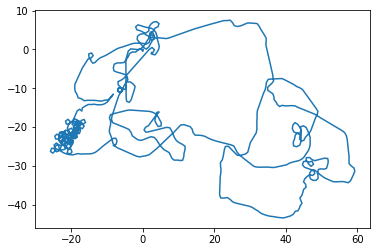

In [5]:
# plt.figure(figsize=(10, (int)(10*(1236/(2792/2)))), dpi=80)
plt.plot(some_csv['Y'],some_csv['X'],label="Real")

In [6]:
some_csv["Y"].min()

-25.88064185

In [19]:
def build_feats_targets(path_to_csvs,num_routers):
    #TODO: implement the function
    temp = pd.read_csv(path_to_csvs).to_numpy()
    if 'feats' not in locals():
        feats = temp[:,:num_routers]
        targets = temp[:,-2:]
    else:
        feats = np.vstack((feats,temp[:,:num_routers]))   
        targets = np.vstack((targets,temp[:,-2:])) 
    
    return feats, targets

In [20]:
# Load data
num_routers=232
feats, targets = build_feats_targets(os.path.join(PROJECT_ROOT_DIR,'ECE_basement.csv'),num_routers)

In [21]:
# Get an Euclidean distance differency
def mean_error_dist(targets, preds):
    # TODO: implement the function
    total = 0
    for i,j in zip(targets, preds):
        total += np.linalg.norm(i-j)
    dist = total/targets.shape[0]
    return dist

# Random Forest Regressor

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feats, targets, test_size=0.30, random_state=42)
X_test, X_real, Y_test, Y_real = train_test_split(X_test, Y_test, test_size=0.30, random_state=42)
X_train.shape,X_test.shape,X_real.shape

((743, 232), (223, 232), (96, 232))

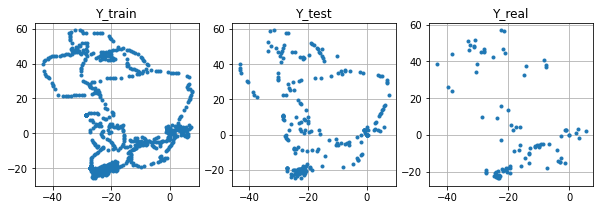

In [34]:
#Analysis points in map 
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, coordinate in zip(axs, ["Y_train", "Y_test", "Y_real"]):
    ax.plot(eval(coordinate)[:,0],eval(coordinate)[:,1],'.')
    ax.set_title(coordinate.capitalize())
    ax.grid(True)

plt.show()

In [41]:
import warnings
from sklearn.linear_model import RidgeClassifier, LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')


models = [("LinearRegression", LinearRegression()), ("Lasso", Lasso()), ("Ridge", Ridge()),("RandomForestRegressor",RandomForestRegressor(random_state=0))]
best_f1 = 0
best_choice = 0
## [ TODO ]
# Complete missing code in the loop body
for j, (model_name, model) in enumerate(models):
    # Begin of metrics for combination
    print("====================")
    print(f"{j+1}. {model_name} :")
    # 2) train labels for training data
    model.fit(X_train,Y_train)

    # 3) Predict labels for val data
    pred_real = model.predict(X_real)
    
    result_med = mean_error_dist(Y_real, pred_real)
    result_mse = mean_squared_error(Y_real, pred_real)
    from sklearn.metrics import mean_squared_error
    print(f"Average\nwith Euclidean distance error:\t{result_med} \nwith MSE:\t{result_mse}\n")

1. LinearRegression :
Average
with Euclidean distance error:	10.00351003864777 
with MSE:	75.55385856608238

2. Lasso :
Average
with Euclidean distance error:	10.439850313705627 
with MSE:	75.99159104200741

3. Ridge :
Average
with Euclidean distance error:	9.999468322102294 
with MSE:	75.4802795018129

4. RandomForestRegressor :
Average
with Euclidean distance error:	5.744434511007257 
with MSE:	41.43145972400284



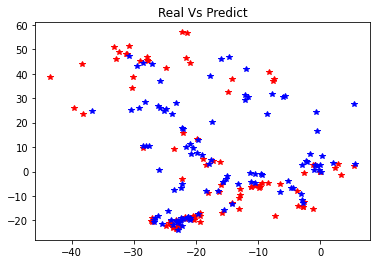

In [32]:
#Analysis points coordinate 
plt.title("Real Vs Predict")
plt.plot(Y_real[:,0],Y_real[:,1],'r*')
plt.plot(pred_real[:,0],pred_real[:,1],'b*')

# LSTM

In [15]:
# Normalize 
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,StandardScaler,Normalizer,RobustScaler
scaler_feats = StandardScaler()
scaler_feats.fit(feats)
feats_normal = scaler_feats.transform(feats)

scaler_targets = MinMaxScaler(feature_range=(-0.4,0.4))
scaler_targets.fit(targets)
targets_normal = scaler_targets.transform(targets)
feats_normal[:,1].min(),feats_normal[:,1].max(),targets_normal[:,1].min(),targets_normal[:,1].max()


(-1.8562995615527729, 2.6590599843379112, -0.4, 0.39999999999999997)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feats_normal, targets_normal, test_size=0.30, random_state=42)
X_test, X_real, Y_test, Y_real = train_test_split(X_test, Y_test, test_size=0.30, random_state=42)
X_train.shape,X_test.shape,X_real.shape

((743, 232), (223, 232), (96, 232))

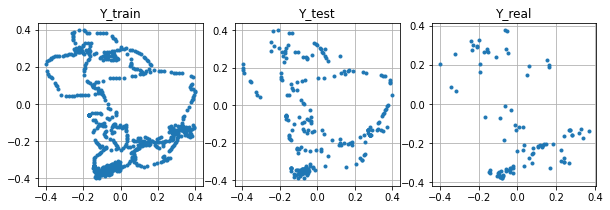

In [ ]:
#Analysis points in map 
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, coordinate in zip(axs, ["Y_train", "Y_test", "Y_real"]):
    ax.plot(eval(coordinate)[:,0],eval(coordinate)[:,1],'.')
    ax.set_title(coordinate.capitalize())
    ax.grid(True)

plt.show()

In [ ]:
#https://stackoverflow.com/questions/54416322/expected-ndim-3-found-ndim-2
X_train=X_train.reshape(-1,1,X_train.shape[1])
Y_train=Y_train.reshape(-1,1,Y_train.shape[1])
X_test=X_test.reshape(-1,1,X_test.shape[1])
Y_test=Y_test.reshape(-1,1,Y_test.shape[1])
X_real=X_real.reshape(-1,1,X_real.shape[1])
Y_real=Y_real.reshape(-1,1,Y_real.shape[1])

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,GRU,Conv1D,Flatten
import time
import tensorflow.keras as keras
model = Sequential()
model.add(LSTM(100, return_sequences=True))
model.add(layers.Dropout(.5,seed=42))
model.add(LSTM(2, return_sequences=True))
model.compile(loss="mean_absolute_error", optimizer="adam", metrics= ['accuracy'])
# Adamax
history = model.fit(X_train,Y_train,epochs=50, validation_data=(X_test,Y_test))

Epoch 1/50
24/24 [==============================] - 13s 80ms/step - loss: 0.1575 - accuracy: 0.6380 - val_loss: 0.1333 - val_accuracy: 0.7130
Epoch 2/50
24/24 [==============================] - 0s 15ms/step - loss: 0.1100 - accuracy: 0.7873 - val_loss: 0.1061 - val_accuracy: 0.8072
Epoch 3/50
24/24 [==============================] - 0s 15ms/step - loss: 0.0900 - accuracy: 0.8641 - val_loss: 0.0887 - val_accuracy: 0.8296
Epoch 4/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0743 - accuracy: 0.8991 - val_loss: 0.0724 - val_accuracy: 0.8834
Epoch 5/50
24/24 [==============================] - 0s 16ms/step - loss: 0.0658 - accuracy: 0.9246 - val_loss: 0.0647 - val_accuracy: 0.8924
Epoch 6/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0615 - accuracy: 0.9192 - val_loss: 0.0605 - val_accuracy: 0.9013
Epoch 7/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0556 - accuracy: 0.9394 - val_loss: 0.0547 - val_accuracy: 0.8969
Epoch 8/50
2

In [ ]:
result = model.predict(X_real)
result = result.reshape(-1,2)
real = Y_real.reshape(-1,2)

3/3 [==============================] - 0s 5ms/step


# Comparison

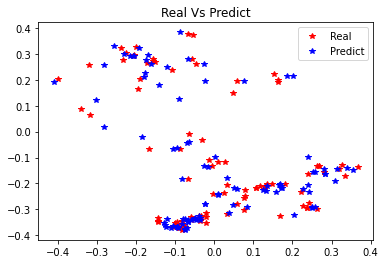

In [ ]:
#Analysis points coordinate without scalering-back
plt.title("Real Vs Predict")
plt.plot(real[:,0],real[:,1],'r*',label="Real")
plt.plot(result[:,0],result[:,1],'b*',label="Predict")
plt.legend()
plt.show()

In [ ]:
result = scaler_targets.inverse_transform(result)
real = scaler_targets.inverse_transform(real)

In [ ]:
from sklearn.metrics import mean_squared_error
result_med = mean_error_dist(real, result)
result_mse = mean_squared_error(real, result)
print(f"Average\nwith Euclidean distance error:\t{result_med} \nwith MSE:\t{result_mse}\n")

TypeError: ignored

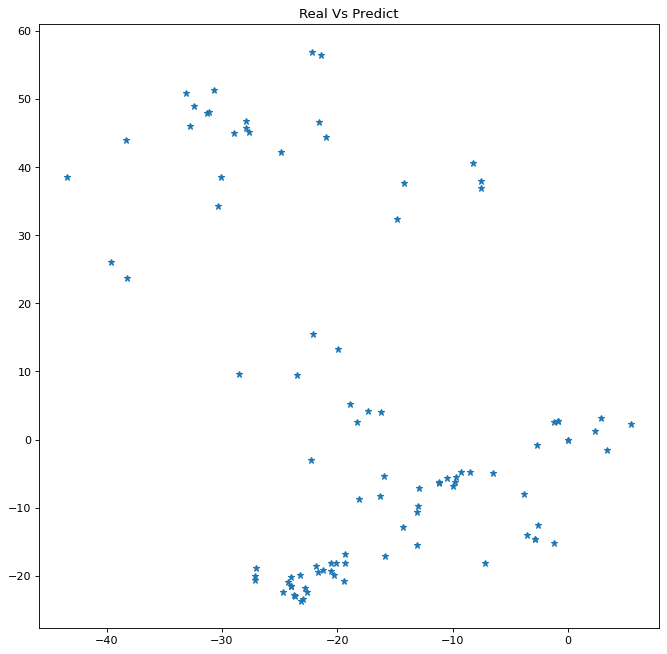

In [ ]:
#Analysis points coordinate
# Random Forest Regressor VS  LSTM
plt.figure(figsize=(10, 10), dpi=80)
plt.title("Real Vs Predict")
plt.plot(real[:,0],real[:,1],'*',label="Real")
plt.plot(result[:,0],result[:,1],'*',label="Predict LSTM")
plt.plot(pred_real[:,0],pred_real[:,1],'*',label="Predict Random Forest Regressor")
plt.legend()
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
for ax,i ,coordinate in zip(axs, [0,1], ["X", "Y"]): 
    ax.plot(real[:,i],label="Real")
    ax.plot(result[:,i],label="Predict LSTM")
    ax.plot(pred_real[:,i],label="Predict Random Forest Regressor") 
    ax.set_title(coordinate.capitalize())
    ax.grid(True)
fig.legend(('Real','Predict LSTM','Predict Random Forest Regressor'),
    loc='upper right')
fig.show()